In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#import modules
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 指定使用GPU编号
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

#import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 加载训练好的模型

In [2]:
# 加载模型
model_name = 'mycnn-' + str(1000)
saver = tf.train.import_meta_graph('./ckpt/' + model_name + '/' + model_name + '.meta')


## 测试模型

INFO:tensorflow:Restoring parameters from ./ckpt/mycnn-1000/mycnn-1000


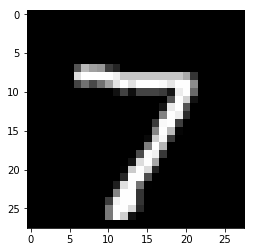

该数字真实值是7
识别到该数字是7



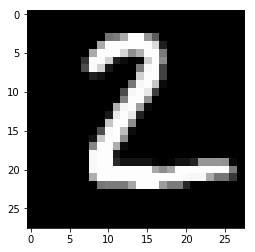

该数字真实值是2
识别到该数字是2



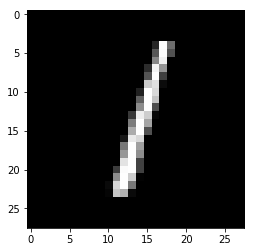

该数字真实值是1
识别到该数字是1



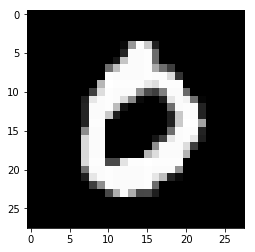

该数字真实值是0
识别到该数字是0



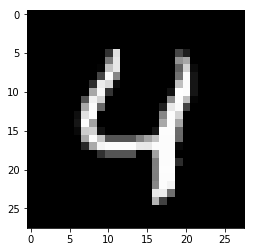

该数字真实值是4
识别到该数字是4



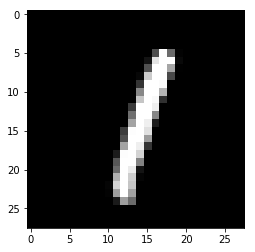

该数字真实值是1
识别到该数字是1



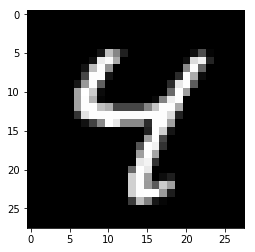

该数字真实值是4
识别到该数字是4



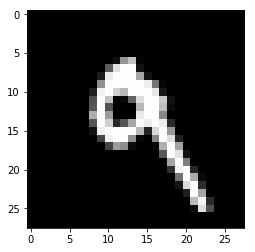

该数字真实值是9
识别到该数字是9



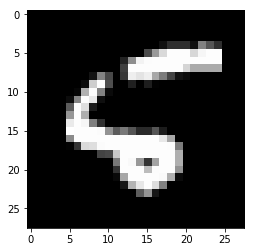

该数字真实值是5
识别到该数字是5



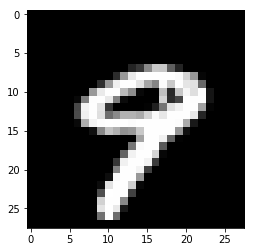

该数字真实值是9
识别到该数字是9



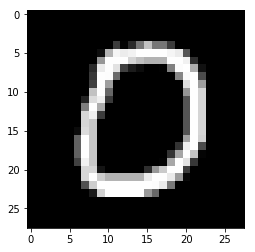

该数字真实值是0
识别到该数字是0



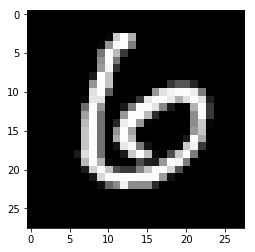

该数字真实值是6
识别到该数字是6



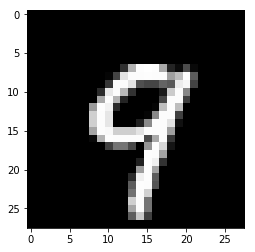

该数字真实值是9
识别到该数字是9



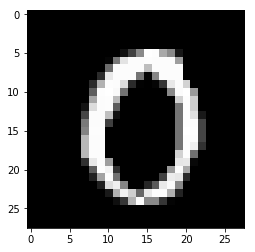

该数字真实值是0
识别到该数字是0



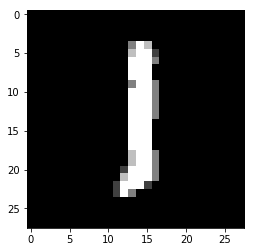

该数字真实值是1
识别到该数字是1



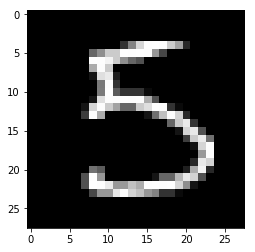

该数字真实值是5
识别到该数字是5



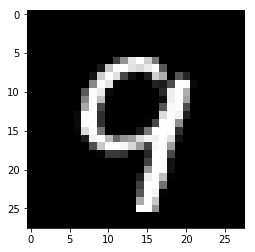

该数字真实值是9
识别到该数字是9



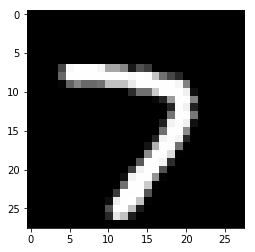

该数字真实值是7
识别到该数字是7



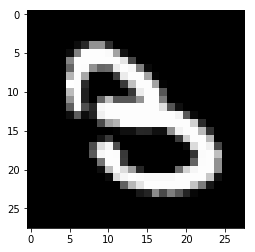

该数字真实值是3
识别到该数字是8



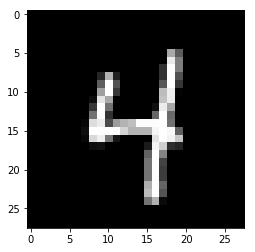

该数字真实值是4
识别到该数字是4



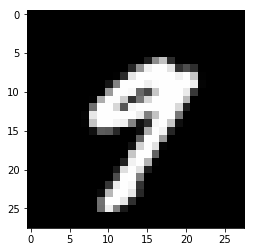

该数字真实值是9
识别到该数字是9



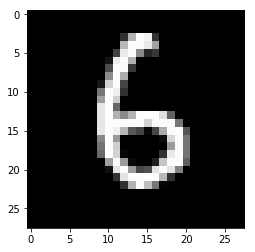

该数字真实值是6
识别到该数字是6



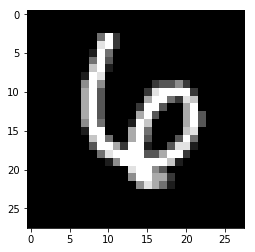

该数字真实值是6
识别到该数字是6



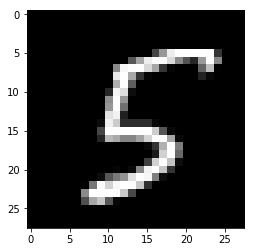

该数字真实值是5
识别到该数字是5



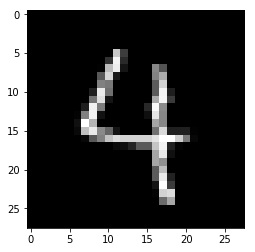

该数字真实值是4
识别到该数字是4



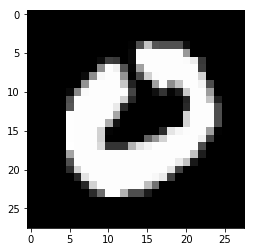

该数字真实值是0
识别到该数字是0



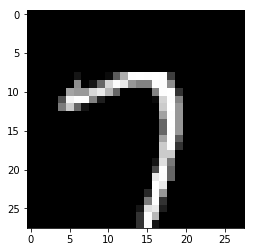

该数字真实值是7
识别到该数字是7



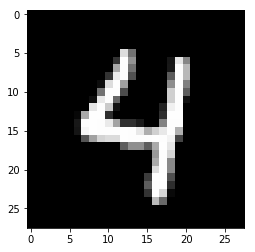

该数字真实值是4
识别到该数字是4



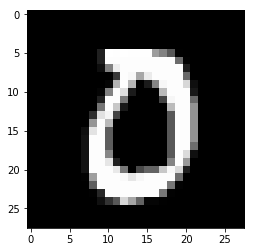

该数字真实值是0
识别到该数字是0



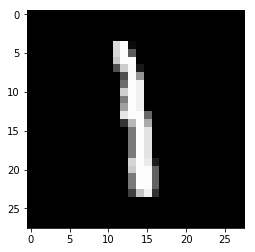

该数字真实值是1
识别到该数字是1



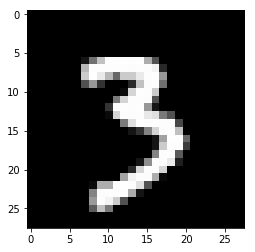

该数字真实值是3
识别到该数字是3



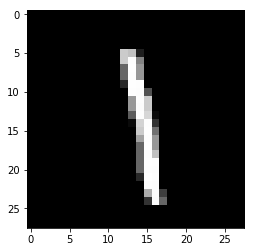

该数字真实值是1
识别到该数字是1



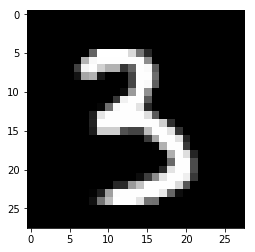

该数字真实值是3
识别到该数字是3



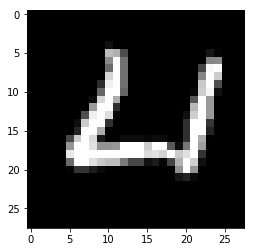

该数字真实值是4
识别到该数字是4



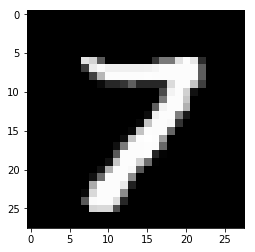

该数字真实值是7
识别到该数字是7



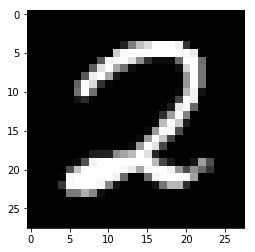

该数字真实值是2
识别到该数字是2



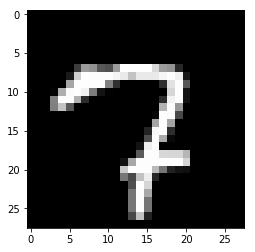

该数字真实值是7
识别到该数字是7



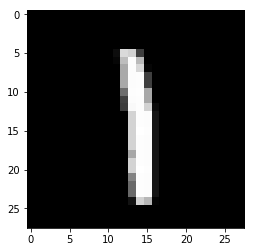

该数字真实值是1
识别到该数字是1



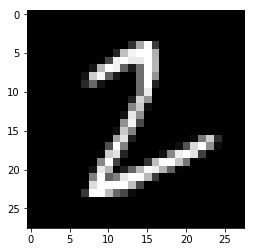

该数字真实值是2
识别到该数字是2



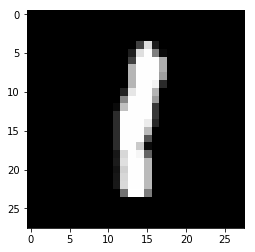

该数字真实值是1
识别到该数字是1



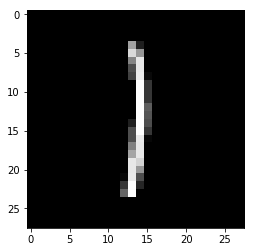

该数字真实值是1
识别到该数字是1



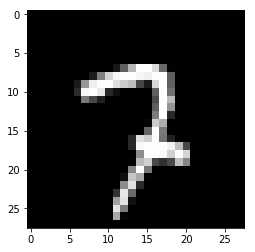

该数字真实值是7
识别到该数字是7



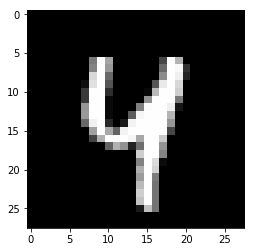

该数字真实值是4
识别到该数字是4



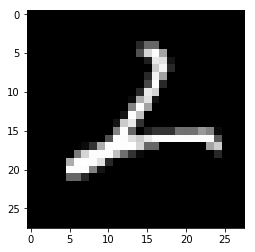

该数字真实值是2
识别到该数字是2



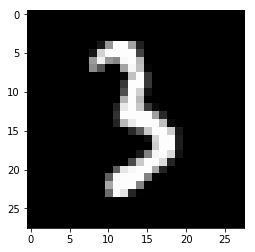

该数字真实值是3
识别到该数字是3



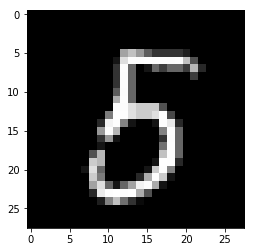

该数字真实值是5
识别到该数字是5



KeyboardInterrupt: 

In [4]:
IMG_SIZE = 28
IMG_CHANNEL = 1


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./ckpt/' + model_name + '/'))
    graph = tf.get_default_graph()
    # 获取输入和输出变量
    X = graph.get_tensor_by_name("Placeholder:0")
    pred = graph.get_tensor_by_name("add_5:0")

    test_x = mnist.test.images
    test_y = mnist.test.labels
    
    for image, label in zip(test_x, test_y):
        image = np.reshape(image, (1, IMG_SIZE, IMG_SIZE, IMG_CHANNEL))
        predict = np.argmax(sess.run(pred, feed_dict={X: image}))
        
#         if predict != np.argmax(label):
        plt.imshow(image.reshape((IMG_SIZE, IMG_SIZE)), cmap='gray')
        plt.show()
        print('该数字真实值是%d'%(np.argmax(label)))
        print('识别到该数字是%d\n'%(predict))